### Guided Project: Analyzing CIA Factbook Using SQL and Python

#### Introduction

In [5]:
# Import and make connection of databse
import pandas as pd
import sqlite3
conn = sqlite3.connect("factbook.db")
cursor = conn.cursor()
query = "select * from sqlite_master where type='table';"
print(cursor.execute(query).fetchall())

[('table', 'facts', 'facts', 2, 'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'), ('table', 'sqlite_sequence', 'sqlite_sequence', 3, 'CREATE TABLE sqlite_sequence(name,seq)')]


In [6]:
# Print out the table information
q = "select * from sqlite_master where type = 'table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [8]:
q1 = "select * from facts limit 5"
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


#### Summary Statistics

In [16]:
# select min,max,min_growth,max_growth
q = "select min(population),max(population), min(population_growth), max(population_growth) from facts;"
pd.read_sql_query(q,conn)

,min(population),max(population),min(population_growth),max(population_growth)
0,0,7256490011,0.0,4.02


#### Checking outliers

In [18]:
q = "select name from facts where population = 0"
pd.read_sql_query(q,conn)

,name
0,Antarctica


In [19]:
q = "select name, max(population) from facts"
pd.read_sql_query(q,conn)

,name,max(population)
0,World,7256490011


It appears to be normal that Antarctica does not have any populatin while the world population is 7.2 billion.

#### Visualization

/dataquest/system/env/python3/lib/python3.4/site-packages/IPython/core/interactiveshell.py:2885: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb1659438>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb1321390>]], dtype=object)

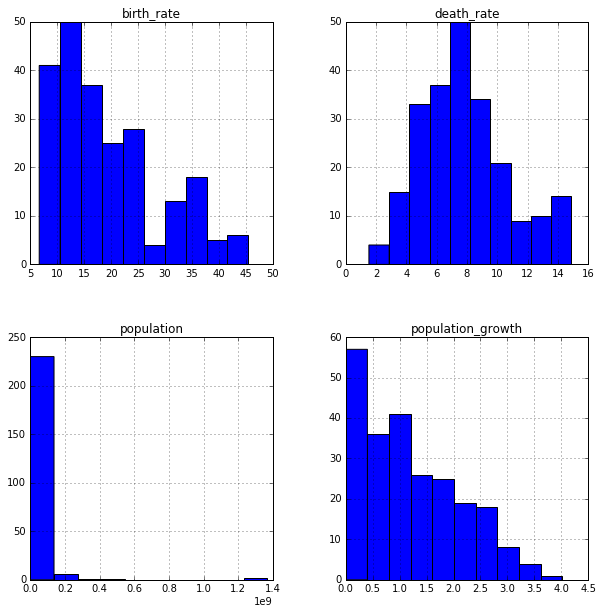

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

fig,ax = plt.subplots(figsize=(10,10))

q = "select population, population_growth, birth_rate, death_rate from facts where population != (select min(population) from facts) and population != (select max(population) from facts);"
pd.read_sql_query(q,conn).hist(ax=ax)

#### Which country has the highest population density?

In [42]:
q = "select name, max(cast(population as float)/cast(area_land as float)) from facts"
pd.read_sql_query(q,conn)

,name,max(cast(population as float)/cast(area_land as float))
0,Macau,21168.964286


Macau has the highest density (ratio of population to land area)

#### Histogram of population density

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcbb1005eb8>]], dtype=object)

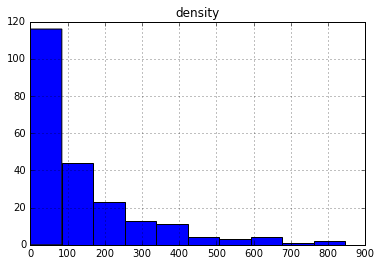

In [50]:
q = "select name, cast(population as float)/cast(area_land as float) density from facts where density < 1000"
fig = plt.figure(figsize=(5,5))
pd.read_sql_query(q,conn).hist()

#### Which country has the highest raitos of water to land?

In [51]:
q = "select name, cast(area_water as float)/cast(area_land as float) ratio from facts where ratio != 0 order by ratio desc"
pd.read_sql_query(q,conn)

,name,ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


#### Which country has more water than land?

In [52]:
q = "select name,area_land land, area_water water from facts where water > land"
pd.read_sql_query(q,conn)

,name,land,water
0,British Indian Ocean Territory,60,54340
1,Virgin Islands,346,1564


British Indian Ocean Territory and Virgin Islands has more water than land